In [1]:
from synthetic_data import *
from projected_gradient_descent import *
from alternative_minimization import *
from logdet import *
from performance_eval import *
import pandas as pd
from scipy.spatial import distance_matrix

## Real Data

In [2]:
df_graph = pd.read_csv('USA_graph_data.txt', header=None)
feat = df_graph.values[:, 2:].astype(np.float)
feat = feat - np.mean(feat)
feat = feat / np.std(feat)
W = np.exp(-(distance_matrix(feat,feat)**2)/1)
L_orig = np.diag(np.sum(W, axis=1)) - W

df = pd.read_csv('temperatures_6years.csv',header = None)  
X = df.values[:, 1:].astype(np.float)
X = X - np.mean(X)
X = X / np.std(X)

## Alternative Minimization (Primal formulation for $L$)

iteration #0
primal value is 12.769234319339425
iteration-0: obj value = 12.761593589990303
iteration #1
primal value is 12.75347864397708
iteration-1: obj value = 12.761373695319495
iteration #2
primal value is 12.753437050821967
iteration-2: obj value = 12.761375325801714


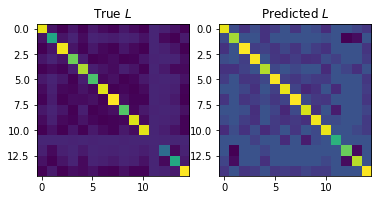

condition positive:100, prediction positive:63, true_positive:61
precision:0.9682539682539683, recall:0.61, f-score:0.7484662576687117, NMI:0.011312350790540375, pearson R:0.6475157961791904


/home/psycuser/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [3]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 1000

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=False)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Alternative Minimization (Dual formulation for $L$)

iteration #0
dual value is 12.768549185158047
iteration-0: obj value = 12.760963988758423
iteration #1
dual value is 12.753424792122951
iteration-1: obj value = 12.760942187035436


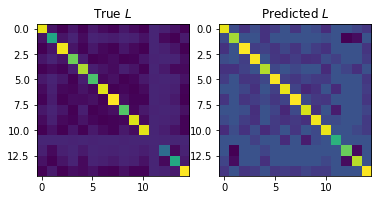

condition positive:100, prediction positive:61, true_positive:61
precision:1.0, recall:0.61, f-score:0.7577639751552795, NMI:0.11939983101722682, pearson R:0.6474524201217738


In [4]:
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 10

L_opt, Y_opt = alternative_minimization(X, alpha=alpha, beta=beta, num_iters=num_iters, dual=True)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Projected Gradient Descent

final objective value = 12.761668135021557
final objective value = 12.762811921839567
final objective value = 12.762366898482727
final objective value = 12.762650677389995
final objective value = 12.761624963619518
final objective value = 12.76239989275041
final objective value = 12.76402371371988
final objective value = 12.762526732616964
final objective value = 12.762448805023759
final objective value = 12.761594375536523


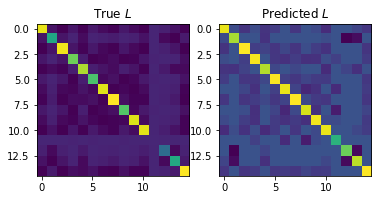

condition positive:100, prediction positive:61, true_positive:61
precision:1.0, recall:0.61, f-score:0.7577639751552795, NMI:0.11939983101722682, pearson R:0.64581339701956


In [5]:
n, p = X.shape
alpha = 1e-2
beta = 10**(-0.2)
num_iters = 1000
eta_L = 0.1
eta_Y = 0.1
    
num_inits = 10
objective_values = np.zeros((num_inits))
L_opt_values = np.zeros((n, n, num_inits))
Y_opt_values = np.zeros((n, p, num_inits))

for idx_init in range(num_inits):

    L_init = project_L(np.random.rand(n,n))

    ret_tuple = proj_grad_descent(X, alpha=alpha, beta=beta, L_init=L_init, 
                                  num_iters=num_iters, eta_L=eta_L, eta_Y=eta_Y)
   
    L_opt_values[:, :, idx_init] = ret_tuple[0]
    Y_opt_values[:, :, idx_init] = ret_tuple[1]
    objective_values[idx_init] = ret_tuple[2]

idx_init_best = np.argmin(objective_values)
L_opt = L_opt_values[:, :, idx_init_best]
Y_opt = Y_opt_values[:, :, idx_init_best]
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")

## Method for comparison

/home/psycuser/.local/lib/python3.6/site-packages/cvxpy/problems/problem.py:1061: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


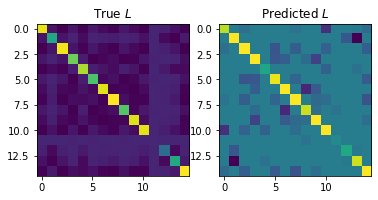

condition positive:100, prediction positive:28, true_positive:28
precision:1.0, recall:0.28, f-score:0.43750000000000006, NMI:0.04561161068070717, pearson R:0.507359612589318


In [6]:
lam = 1e1
L_opt = logdet(X, lam)
visualise_L(L_orig, L_opt)
precision, recall, f, NMI, R = graph_learning_perf_eval(L_orig, L_opt)
print(f"precision:{precision}, recall:{recall}, f-score:{f}, NMI:{NMI}, pearson R:{R}")